<a href="https://colab.research.google.com/github/zainmo11/Credit_card_fraud_Detection/blob/main/Credit_card_fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01. Import Libraries**

In [4]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.3 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings


warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# **02. Load Dataset**

In [6]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [7]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0


In [8]:
!unzip creditcardfraud.zip


Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [9]:
df = pd.read_csv('creditcard.csv',engine='pyarrow',dtype_backend='pyarrow')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151   0.16648  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209   0.37978 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   0.16717   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ...   -0.1083  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267  -0.20601   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458   123.5      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [10]:
df.dtypes

Time      double[pyarrow]
V1        double[pyarrow]
V2        double[pyarrow]
V3        double[pyarrow]
V4        double[pyarrow]
V5        double[pyarrow]
V6        double[pyarrow]
V7        double[pyarrow]
V8        double[pyarrow]
V9        double[pyarrow]
V10       double[pyarrow]
V11       double[pyarrow]
V12       double[pyarrow]
V13       double[pyarrow]
V14       double[pyarrow]
V15       double[pyarrow]
V16       double[pyarrow]
V17       double[pyarrow]
V18       double[pyarrow]
V19       double[pyarrow]
V20       double[pyarrow]
V21       double[pyarrow]
V22       double[pyarrow]
V23       double[pyarrow]
V24       double[pyarrow]
V25       double[pyarrow]
V26       double[pyarrow]
V27       double[pyarrow]
V28       double[pyarrow]
Amount    double[pyarrow]
Class      int64[pyarrow]
dtype: object

In [11]:
# Make Time column as int64 and Class as boolean
df['Time'] = df['Time'].astype('int64')
df['Class'] = df['Class'].astype('bool')

In [12]:
df.dtypes

Time                int64
V1        double[pyarrow]
V2        double[pyarrow]
V3        double[pyarrow]
V4        double[pyarrow]
V5        double[pyarrow]
V6        double[pyarrow]
V7        double[pyarrow]
V8        double[pyarrow]
V9        double[pyarrow]
V10       double[pyarrow]
V11       double[pyarrow]
V12       double[pyarrow]
V13       double[pyarrow]
V14       double[pyarrow]
V15       double[pyarrow]
V16       double[pyarrow]
V17       double[pyarrow]
V18       double[pyarrow]
V19       double[pyarrow]
V20       double[pyarrow]
V21       double[pyarrow]
V22       double[pyarrow]
V23       double[pyarrow]
V24       double[pyarrow]
V25       double[pyarrow]
V26       double[pyarrow]
V27       double[pyarrow]
V28       double[pyarrow]
Amount    double[pyarrow]
Class                bool
dtype: object

In [13]:
df.tail()

Time         V1         V2        V3        V4        V5        V6  \
284802  172786 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  172787  -0.732789   -0.05508   2.03503 -0.738589  0.868229  1.058415   
284804  172788   1.919565  -0.301254  -3.24964 -0.557828  2.630515   3.03126   
284805  172788   -0.24044   0.530483   0.70251  0.689799 -0.377961  0.623708   
284806  172792  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  ...       V21       V22       V23  \
284802 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   1.01448   
284803   0.02433  0.294869    0.5848  ...  0.214205  0.924384  0.012463   
284804 -0.296827  0.708417  0.432454  ...  0.232045  0.578229 -0.037501   
284805  -0.68618  0.679145  0.392087  ...  0.265245  0.800049 -0.163298   
284806  1.577006  -0.41465   0.48618  ...  0.261057  0.643078  0.376777   

             V24       V25       V26       V27       V28  Amount  Class  
284802 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77  False  
284803 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79  False  
284804  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88  False  
284805  0.123205 -0.569159  0.546668  0.108821  0.104533    10.0  False  
284806  0.008797 -0.473649 -0.818267 -0.002415  0.013649   217.0  False  

[5 rows x 31 columns]

# **03. Data Issues**

In [14]:
# check missing values
print("Missing Values:",df.isnull().sum())

Missing Values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [15]:
# check duplicate
print("Duplicates:",df.duplicated().sum())

Duplicates: 1081


In [16]:
# Display some duplicate rows for inspection
duplicate_rows = df[df.duplicated(keep=False)]
print("\nSample of Duplicate Rows:\n", duplicate_rows.head())


Sample of Duplicate Rows:
      Time        V1        V2        V3        V4        V5        V6  \
32     26 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33     26 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34     26 -0.535388  0.865268  1.351076  0.147575   0.43368  0.086983   
35     26 -0.535388  0.865268  1.351076  0.147575   0.43368  0.086983   
112    74   1.03837  0.127486  0.184456   1.10995  0.441699  0.945283   

           V7        V8        V9  ...       V21       V22       V23  \
32   0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
33   0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
34   0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
35   0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
112 -0.036715  0.350995   0.11895  ...   0.10252  0.605089  0.023092   

          V24       V25       V26       V27       V28  Amount  Class  
32   0.001031  0.098816 -0.55

In [17]:
# Check if duplicates are fraud or non-fraud
duplicate_class_dist = duplicate_rows['Class'].value_counts()
print("\nClass Distribution of Duplicates:\n", duplicate_class_dist)


Class Distribution of Duplicates:
 Class
False    1822
True       32
Name: count, dtype: int64


In [18]:
# Number of every class
class_dist = df['Class'].value_counts()
class_dist

Class
False    284315
True        492
Name: count, dtype: int64

In [19]:
# Calculate the percentage of duplicates for each class
fraud_percentage = (duplicate_class_dist.get(1, 0) / class_dist.get(1, 0)) * 100
non_fraud_percentage = (duplicate_class_dist.get(0, 0) / class_dist.get(0, 0)) * 100

# Print the percentages
print(f"Percentage of Duplicate Non-Fraud Transactions: {non_fraud_percentage:.2f}%")
print(f"\nPercentage of Duplicate Fraud Transactions: {fraud_percentage:.2f}%")

Percentage of Duplicate Non-Fraud Transactions: 0.64%

Percentage of Duplicate Fraud Transactions: 6.50%


**Note:** So, it is better to remove **duplicates**

# **04. Data Preprocessing**

In [20]:
df = df.drop_duplicates()
# check duplicate
print("Duplicates:",df.duplicated().sum())

Duplicates: 0


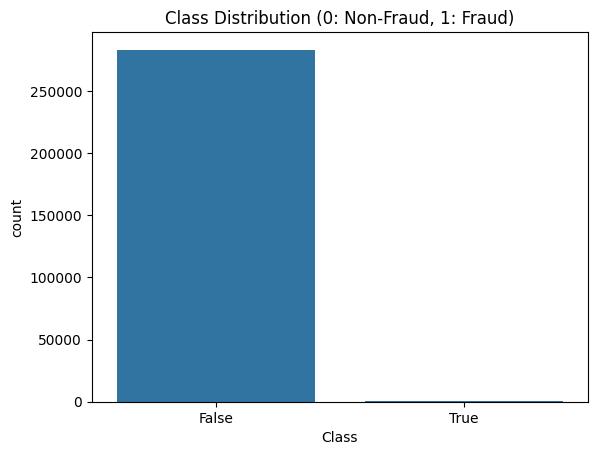

In [21]:
# Visualize class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud.


we don't want our model to assume, we want our model to detect patterns that give signs of fraud

In [22]:
df

Time         V1         V2        V3        V4        V5        V6  \
0            0  -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0   1.191857   0.266151   0.16648  0.448154  0.060018 -0.082361   
2            1  -1.358354  -1.340163  1.773209   0.37978 -0.503198  1.800499   
3            1  -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2  -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...        ...        ...        ...       ...       ...       ...       ...   
284802  172786 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  172787  -0.732789   -0.05508   2.03503 -0.738589  0.868229  1.058415   
284804  172788   1.919565  -0.301254  -3.24964 -0.557828  2.630515   3.03126   
284805  172788   -0.24044   0.530483   0.70251  0.689799 -0.377961  0.623708   
284806  172792  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  ...       V21       V22       V23  \
0       0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1      -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2       0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3       0.237609  0.377436 -1.387024  ...   -0.1083  0.005274 -0.190321   
4       0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   
...          ...       ...       ...  ...       ...       ...       ...   
284802 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   1.01448   
284803   0.02433  0.294869    0.5848  ...  0.214205  0.924384  0.012463   
284804 -0.296827  0.708417  0.432454  ...  0.232045  0.578229 -0.037501   
284805  -0.68618  0.679145  0.392087  ...  0.265245  0.800049 -0.163298   
284806  1.577006  -0.41465   0.48618  ...  0.261057  0.643078  0.376777   

             V24       V25       V26       V27       V28  Amount  Class  
0       0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62  False  
1      -0.339846   0.16717  0.125895 -0.008983  0.014724    2.69  False  
2      -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66  False  
3      -1.175575  0.647376 -0.221929  0.062723  0.061458   123.5  False  
4       0.141267  -0.20601  0.502292  0.219422  0.215153   69.99  False  
...          ...       ...       ...       ...       ...     ...    ...  
284802 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77  False  
284803 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79  False  
284804  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88  False  
284805  0.123205 -0.569159  0.546668  0.108821  0.104533    10.0  False  
284806  0.008797 -0.473649 -0.818267 -0.002415  0.013649   217.0  False  

[283726 rows x 31 columns]

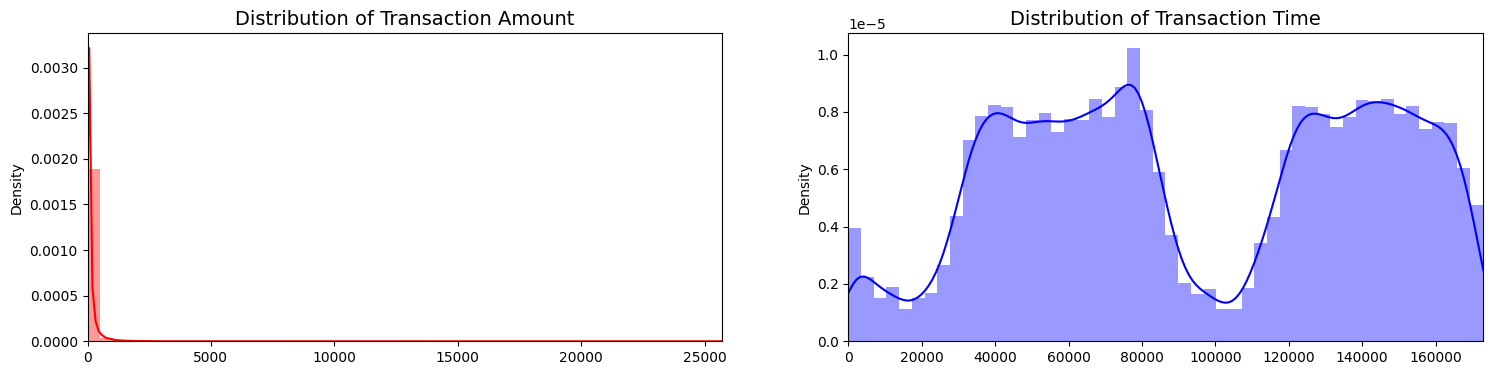

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

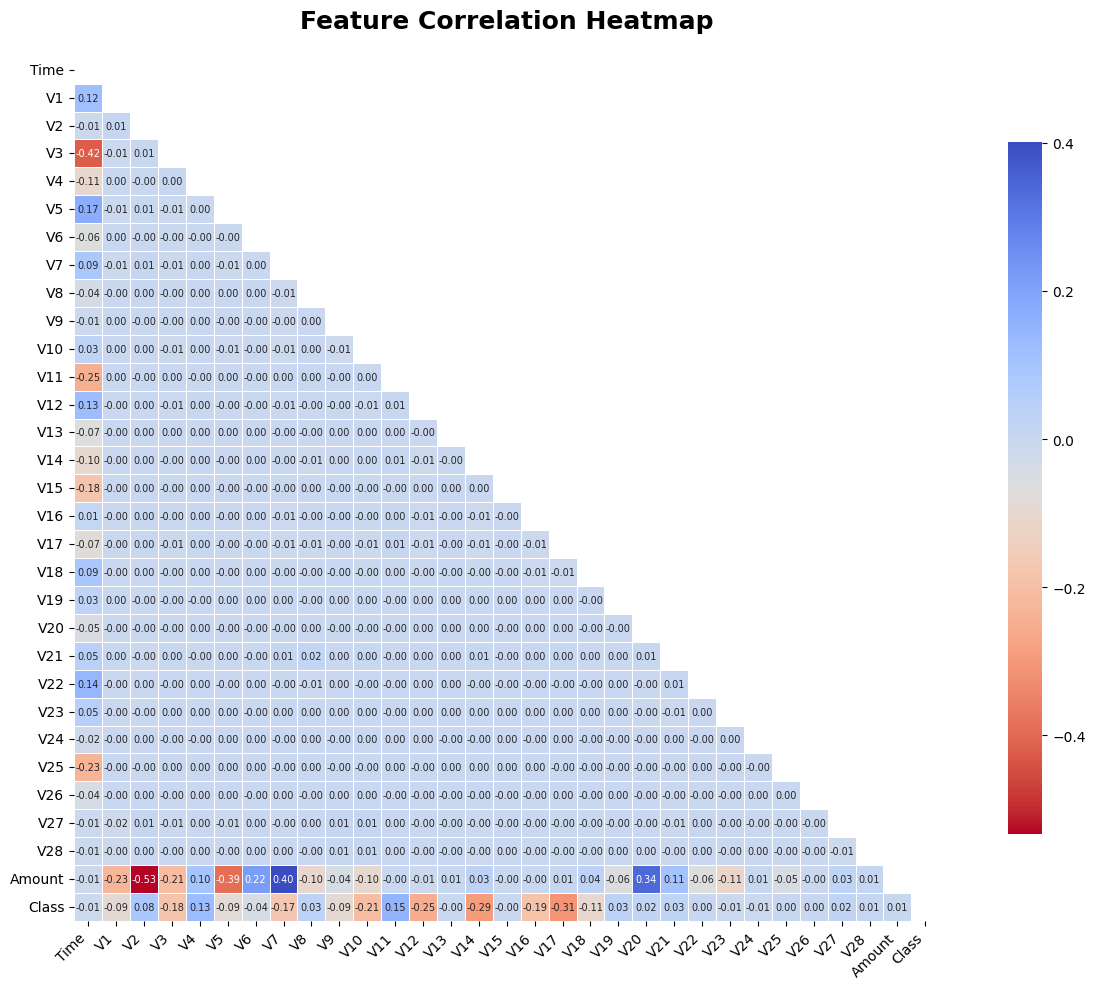

In [28]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = df.corr()

sns.heatmap(
    corr,
    cmap='coolwarm_r',
    annot=True,
    annot_kws={'size': 7},
    fmt='.2f',
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.8},
    mask=np.triu(corr)
)

plt.title('Feature Correlation Heatmap', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Feature pairs with correlation > 0.07:
    Feature1 Feature2  correlation
0       Time       V1     0.117927
2       Time       V3    -0.422054
3       Time       V4    -0.105845
4       Time       V5     0.173223
6       Time       V7     0.085335
10      Time      V11    -0.248536
11      Time      V12     0.125500
13      Time      V14    -0.100316
14      Time      V15    -0.184392
16      Time      V17    -0.073819
17      Time      V18     0.090305
21      Time      V22     0.143727
24      Time      V25    -0.233262
57        V1   Amount    -0.230105
85        V2   Amount    -0.533428
112       V3   Amount    -0.212410
138       V4   Amount     0.099514
163       V5   Amount    -0.387685
187       V6   Amount     0.216389
210       V7   Amount     0.400408
232       V8   Amount    -0.104662
273      V10   Amount    -0.102255
418      V20   Amount     0.340729
427      V21   Amount     0.108058
442      V23   Amount    -0.112833


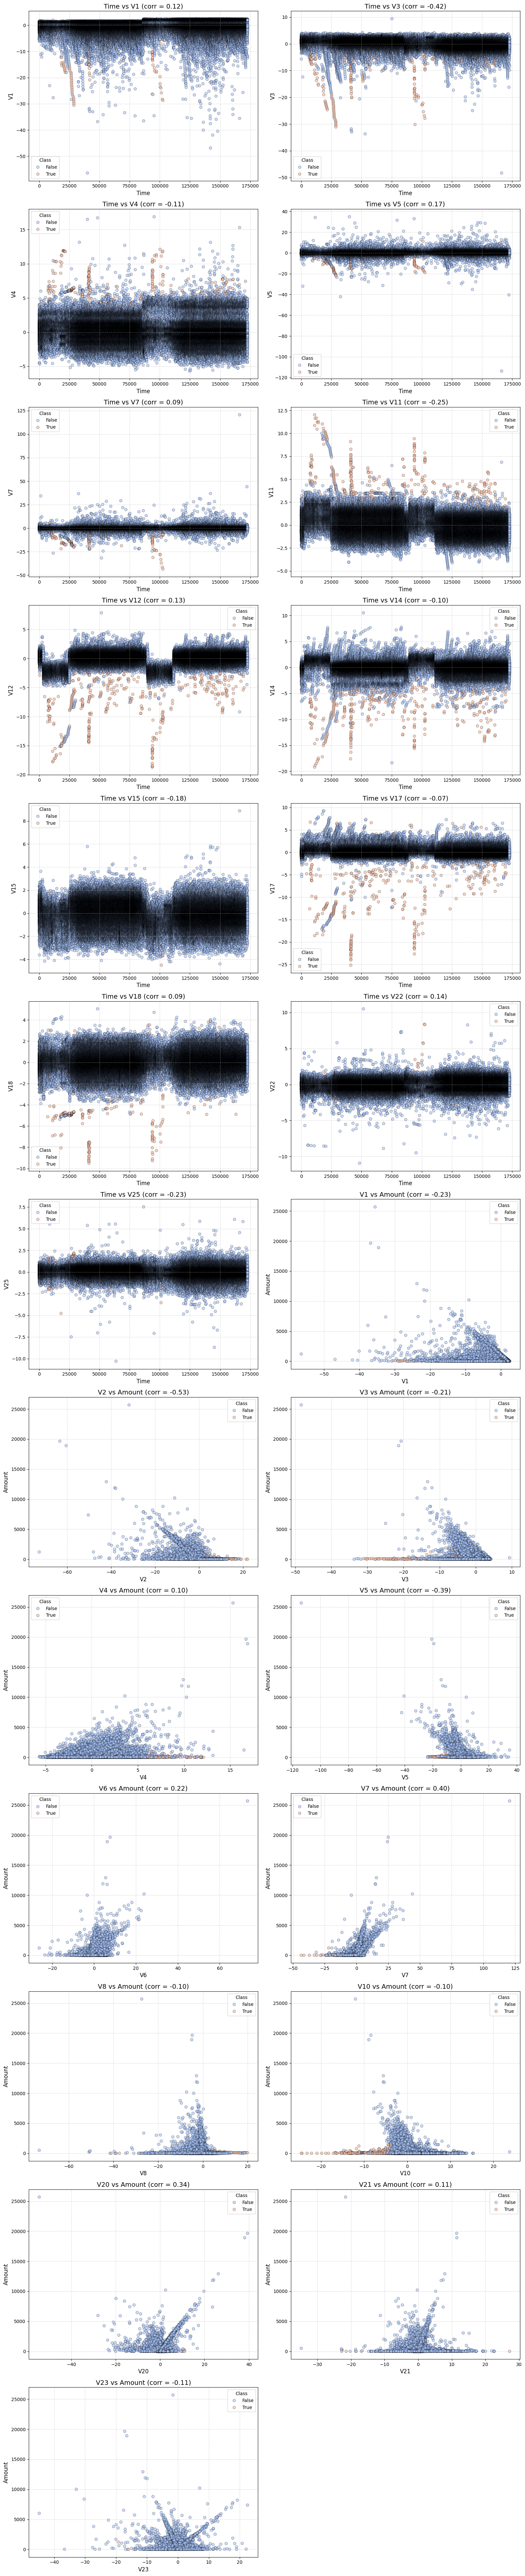

In [34]:
# Compute the correlation matrix
corr = df.corr()

# Find feature pairs with correlation > 0.07 (absolute)
high_corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={0: 'correlation', 'level_0': 'Feature1', 'level_1': 'Feature2'})
)

# Filter pairs with |correlation| > 0.07 and exclude 'Class'
high_corr_pairs = high_corr_pairs[
    (np.abs(high_corr_pairs['correlation']) > 0.07) &
    (high_corr_pairs['Feature1'] != 'Class') &
    (high_corr_pairs['Feature2'] != 'Class')
]
print(f"Feature pairs with correlation > 0.07:\n{high_corr_pairs}")

# Plot two graphs per row
n_cols = 2
n_rows = (len(high_corr_pairs) + 1) // n_cols  # +1 to handle odd number

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))
axes = axes.flatten()

for idx, (ax, (_, row)) in enumerate(zip(axes, high_corr_pairs.iterrows())):
    sns.scatterplot(
        data=df,
        x=row['Feature1'],
        y=row['Feature2'],
        hue='Class',
        palette='coolwarm',
        alpha=0.6,
        edgecolor='k',
        ax=ax
    )
    ax.set_title(f"{row['Feature1']} vs {row['Feature2']} (corr = {row['correlation']:.2f})", fontsize=14)
    ax.set_xlabel(row['Feature1'], fontsize=12)
    ax.set_ylabel(row['Feature2'], fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

# Hide any empty subplots
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Feature Correlation Insights

#### Time Correlations:
- **Time** shows moderate correlation with several features:
  - **Strongest negative correlation** with `V3` (**-0.42**):  
    → As time progresses, `V3` tends to decrease significantly.
  - Other moderate correlations:
    - Positive: `V5` (**0.17**), `V22` (**0.14**), `V12` (**0.13**), `V1` (**0.12**), `V18` (**0.09**), `V7` (**0.085**).
    - Negative: `V11` (**-0.25**), `V25` (**-0.23**), `V15` (**-0.18**), `V4` (**-0.10**), `V14` (**-0.10**), `V17` (**-0.07**).

**Interpretation:**  
The moderate correlations with time suggest that some feature patterns shift over the dataset's collection period, possibly related to transaction trends across different times (e.g., day/night activity).

---

#### Amount Correlations:
- **Amount** is significantly correlated with several features:
  - Strongest correlations:
    - Negative: `V2` (**-0.53**), `V5` (**-0.39**), `V3` (**-0.21**).
    - Positive: `V7` (**0.40**), `V20` (**0.34**), `V6` (**0.22**).
  - Other moderate correlations:
    - Positive: `V21` (**0.11**), `V4` (**0.10**).
    - Negative: `V8` (**-0.10**), `V10` (**-0.10**), `V23` (**-0.11**).

**Interpretation:**  
Certain features, likely PCA-transformed components, have strong relationships with the transaction amount. Features such as `V2`, `V5`, `V7`, and `V20` appear important and could be valuable for downstream tasks like modeling or anomaly detection.

